In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [2]:
# Load the Iris dataset using the local Windows file path
df = pd.read_csv(r'C:\Users\Nishtha Singh\Downloads\Iris.csv')

# Show first few rows
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [3]:
# Drop the Id column
df.drop('Id', axis=1, inplace=True)

# Split features and target
X = df.drop('Species', axis=1)
y = df['Species']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
# Try different values of k
k_values = range(1, 11)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k} -> Accuracy: {acc:.4f}")

K=1 -> Accuracy: 0.9667
K=2 -> Accuracy: 0.9333
K=3 -> Accuracy: 0.9333
K=4 -> Accuracy: 0.9333
K=5 -> Accuracy: 0.9333
K=6 -> Accuracy: 0.9333
K=7 -> Accuracy: 0.9667
K=8 -> Accuracy: 0.9333
K=9 -> Accuracy: 0.9667
K=10 -> Accuracy: 0.9667


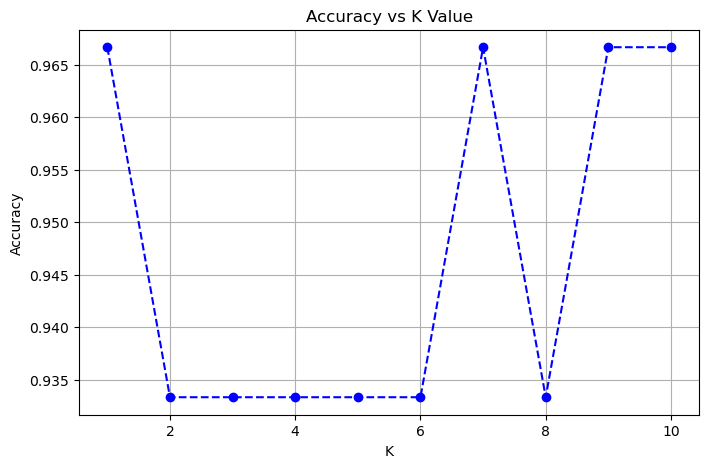

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='--', color='b')
plt.title('Accuracy vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

Accuracy: 0.9333
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.80      0.89        10

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



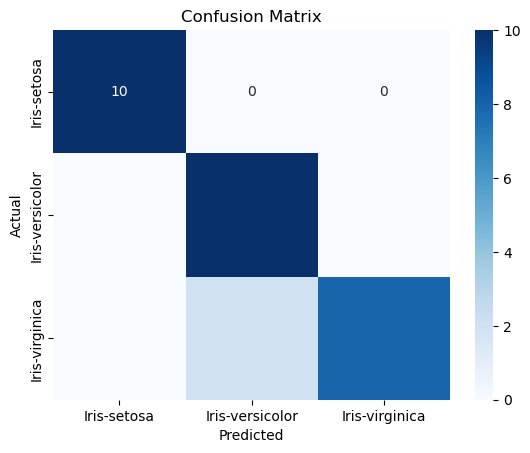

In [7]:
# Final model with best K (you can choose best from plot)
best_k = 3
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Accuracy and Confusion Matrix
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d', 
            xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

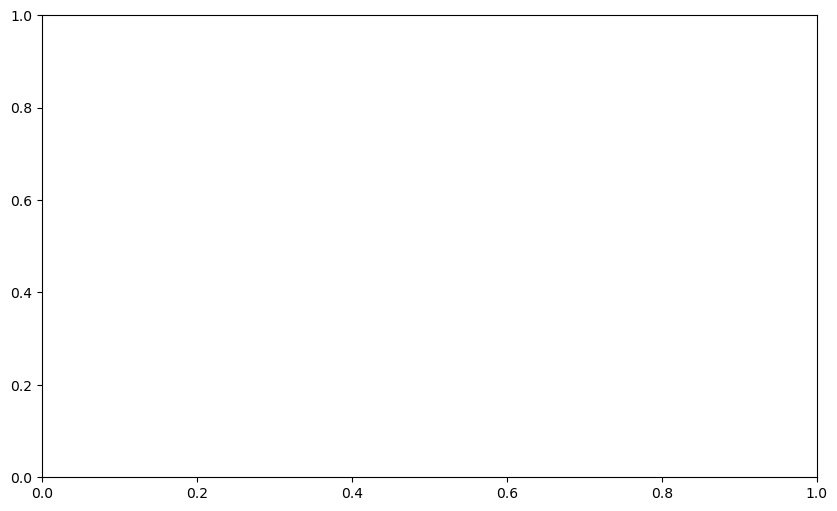

In [8]:
from sklearn.preprocessing import LabelEncoder

# Use only 2 features for visualization
X_vis = df[['PetalLengthCm', 'PetalWidthCm']]
y_vis = df['Species']

# Encode labels into numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_vis)

# Normalize the features
X_vis_scaled = scaler.fit_transform(X_vis)

# Train KNN model with encoded labels
knn_vis = KNeighborsClassifier(n_neighbors=3)
knn_vis.fit(X_vis_scaled, y_encoded)

# Create meshgrid
h = 0.02
x_min, x_max = X_vis_scaled[:, 0].min() - 1, X_vis_scaled[:, 0].max() + 1
y_min, y_max = X_vis_scaled[:, 1].min() - 1, X_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class for each point in mesh
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Pastel1')

# Scatter original data
sns.scatterplot(x=X_vis_scaled[:, 0], y=X_vis_scaled[:, 1], 
                hue=y_vis, palette='bright', edgecolor='k')
plt.xlabel("Petal Length (scaled)")
plt.ylabel("Petal Width (scaled)")
plt.title("KNN Decision Boundaries (K=3)")
plt.show()
